# Business Crawler - Data Analysis and Visualization

This notebook provides an interactive dashboard to analyze the data generated by the Business Crawler. It loads the merged results and domain statistics to visualize key insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import re

# Configure plot styles
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Load Data

In [2]:
merged_csv_path = 'output/_all_queries_merged.csv'
domain_stats_path = 'output/_domain_stats_summary.csv'

if os.path.exists(merged_csv_path):
    df_merged = pd.read_csv(merged_csv_path)
    print(f"Loaded merged data: {len(df_merged)} rows")
else:
    df_merged = pd.DataFrame()
    print(f"Merged data file not found at {merged_csv_path}. Please run main.py first.")

if os.path.exists(domain_stats_path):
    df_domain_stats = pd.read_csv(domain_stats_path)
    print(f"Loaded domain statistics: {len(df_domain_stats)} rows")
else:
    df_domain_stats = pd.DataFrame()
    print(f"Domain statistics file not found at {domain_stats_path}. Please run main.py first.")

Loaded merged data: 18 rows
Loaded domain statistics: 16 rows


## 2. Articles per Topic

/var/folders/7g/q4bdxd8s7xd3lw5j6j3g_m2r0000gq/T/ipykernel_17059/1680898476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')


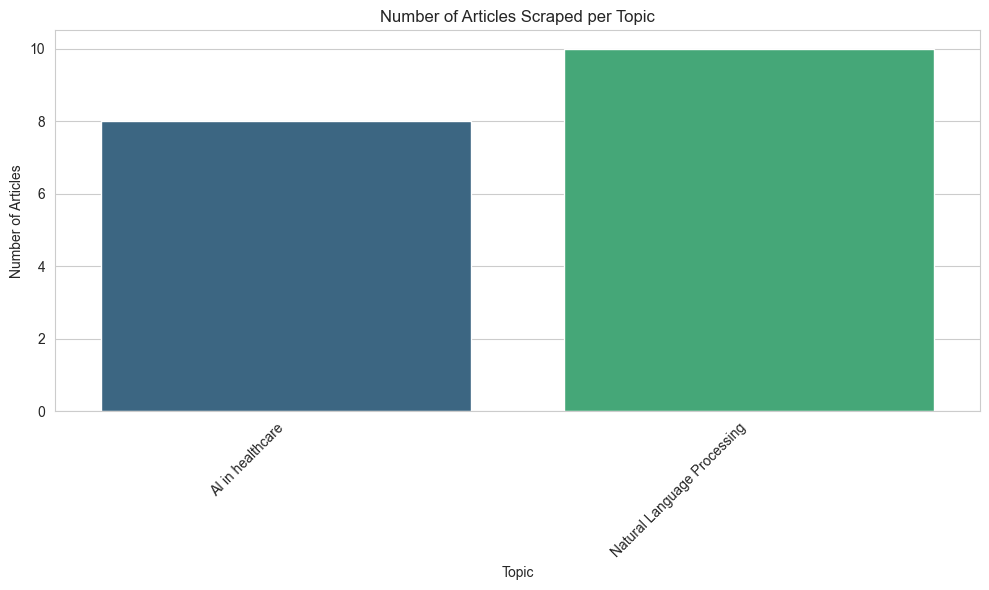

In [3]:
if not df_merged.empty:
    topic_counts = df_merged['topic'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
    plt.title('Number of Articles Scraped per Topic')
    plt.xlabel('Topic')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No merged data to visualize articles per topic.")

## 3. Domain Success/Failure Rates

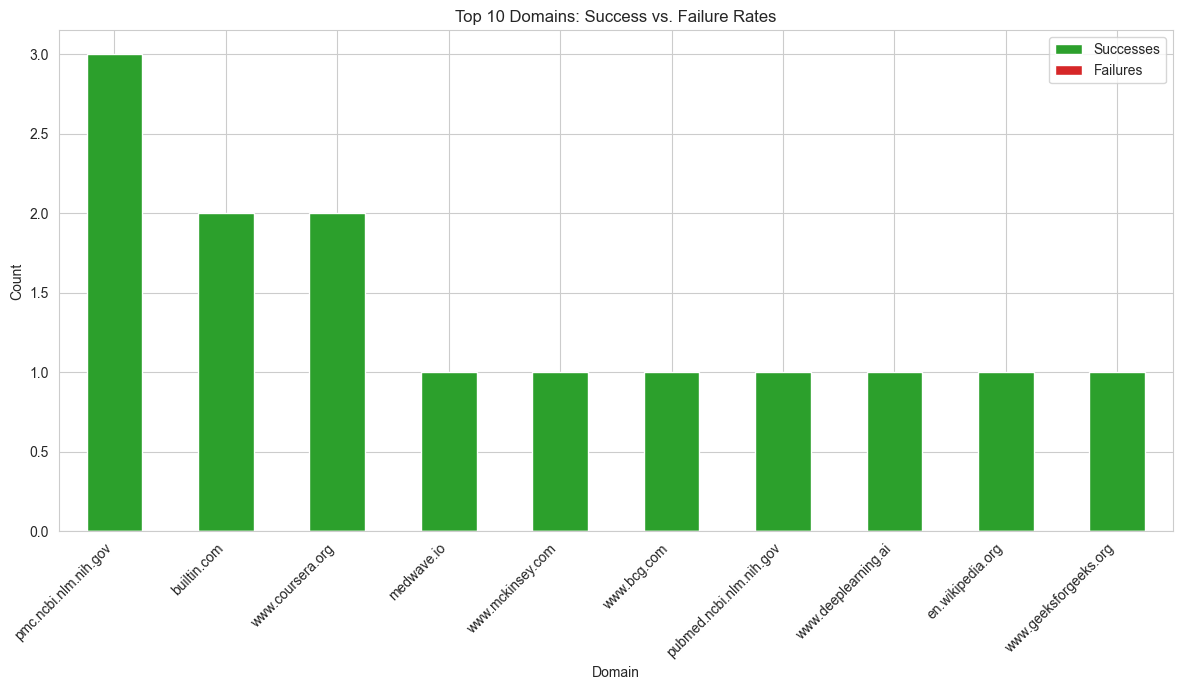

In [4]:
if not df_domain_stats.empty:
    df_domain_stats['total'] = df_domain_stats['successes'] + df_domain_stats['failures']
    df_domain_stats_sorted = df_domain_stats.sort_values(by='total', ascending=False).head(10) # Top 10 domains

    df_domain_stats_sorted[['successes', 'failures']].plot(kind='bar', stacked=True, figsize=(12, 7), color=['#2ca02c', '#d62728'])
    plt.title('Top 10 Domains: Success vs. Failure Rates')
    plt.xlabel('Domain')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(df_domain_stats_sorted)), labels=df_domain_stats_sorted['domain'], rotation=45, ha='right')
    plt.legend(['Successes', 'Failures'])
    plt.tight_layout()
    plt.show()
else:
    print("No domain statistics to visualize.")

## 4. Word Count Distribution of Scraped Content

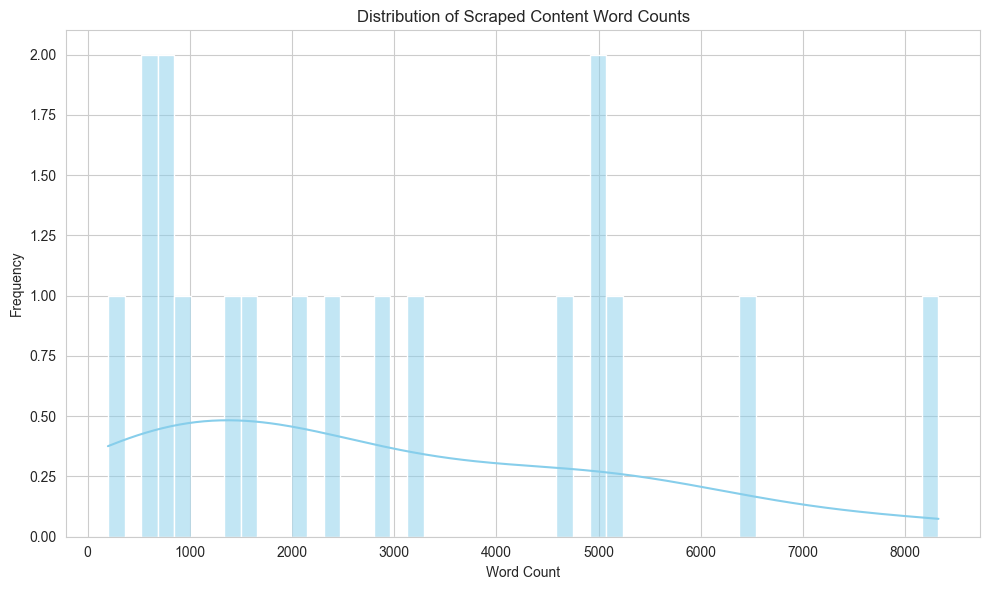

In [5]:
if not df_merged.empty and 'content' in df_merged.columns:
    df_merged['word_count'] = df_merged['content'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(df_merged['word_count'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Scraped Content Word Counts')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("No merged data or 'content' column to visualize word count distribution.")

## 5. Scraping Timelines

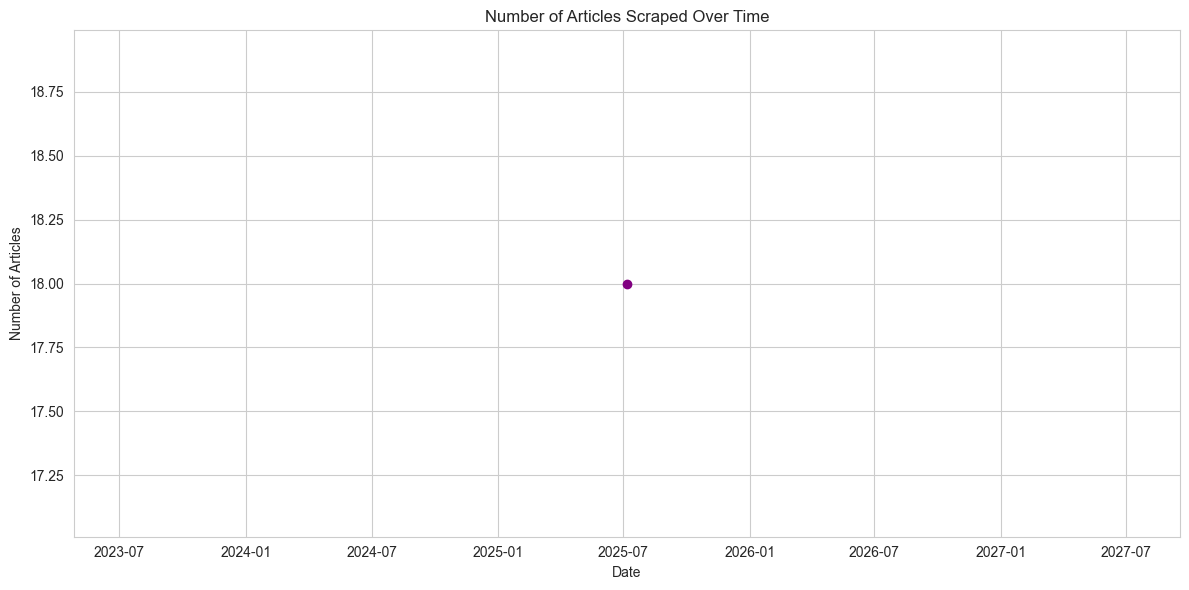

In [6]:
if not df_merged.empty and 'scraped_at' in df_merged.columns:
    df_merged['scraped_at'] = pd.to_datetime(df_merged['scraped_at'])
    df_merged['date'] = df_merged['scraped_at'].dt.date
    articles_per_day = df_merged['date'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    articles_per_day.plot(kind='line', marker='o', color='purple')
    plt.title('Number of Articles Scraped Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No merged data or 'scraped_at' column to visualize scraping timelines.")